In [18]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

---
#Estimating the Model Parameters
---

---
##If we use the same cost function as was used in Linear Regression we find we no longer have a convex function
##The shape of the cost function is bowl shaped but because we have introduced a non-linearity into the cost function the bowl has many local minima, not just a single global minimum
##GD will end up in a non-optimal local minimum
---

---
##We need a better cost function
##$Cost(h^{'}(x), y) = \bigg\{ \begin{array}{rr}
-log(h^{'}(x)) & if y=1\\
-log(1-h^{'}(x)) & if y=0\\
\end{array} $
##Remember $h^{'}(x)$ returns a value between 0 and 1
---

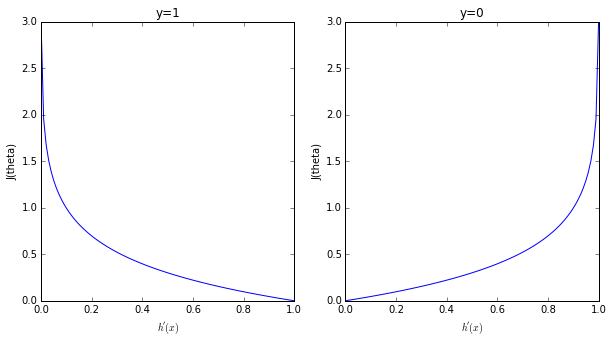

In [19]:
#this is a plot of the new cost function

fig = plt.figure(figsize=(10,5))
ax=plt.subplot(121)
ax.set_xlim(0,1)
ax.set_xlabel("$h'(x)$")
ax.set_ylabel('J(theta)')
ax.set_title("y=1")
x=np.linspace(0.001,0.999,100)
ax.plot(x,-np.log10(x))

ax1=plt.subplot(122)
ax1.set_title("y=0")
ax1.set_xlabel("$h'(x)$")
ax1.set_ylabel('J(theta)')
ax1.plot(x, -np.log10(1-x))

---
#Consider the following cases:
## * hypothesis returns 1, and that feature belongs to class 1 (y=1). Cost = 0
## * hypothesis returns 0, and the feature belongs to class 1 (y=1). Cost = $\infty$
## * hypothesis returns 1, and the feature belongs to class 0 (y=0). Cost = $\infty$
## * hypothesis returns 0, and the feature belongs to class 0 (y=0). Cost = 0
##This is what we want!
##Now have a cost function which can be minmized to a global minimum
---

---
##$Cost(h^{'}(x), y) = -y\log(h^{'}(x)) - (1-y)\log(1-h^{'}(x))$
---

---
##Reality check:

##Let $y = 1$

##$Cost(h^{'}(x), y) = -\log(h^{'}(x))$

##Let $y = 0$

##$Cost(h^{'}(x), y) = -\log(1-h^{'}(x))$

##The same as above
---

---
#Final Cost Function
##$$J(\theta)=\frac{1}{m}\sum_{i=1}^{m}Cost(h^{'}(x), y)$$

##$$=-\frac{1}{m}\big[\sum_{i=1}^{m}y\log(h^{'}(x)) + (1-y)\log(1-h^{'}(x))\big]$$
---

---
##As before minimize $J(\theta)$ to find a set of $\theta s$
##Use the gradient descent algorithm
##The derivative is exactly the same as for linear regression!!!
##and hence the gradient descent update rule is identical
##BUT THEY ARE NOT THE SAME. $h_{\theta}(x)$ is fundamentally different
---

---
##Remember to scale your features when using GD for Logistic Regression
---

---
##Advanced Optimization Algorithms:
###Conjugate gradients
###BFGS - Broydon-Fletcher-Goldfarb-Shanno
###L-BFGS - Low Memory Broydon-Fletcher-Goldfarb-Shanno
---

---
#Worked example - not using sklearn
---

[(0, 3), (1, 2), (2, 1), (3, 0)]


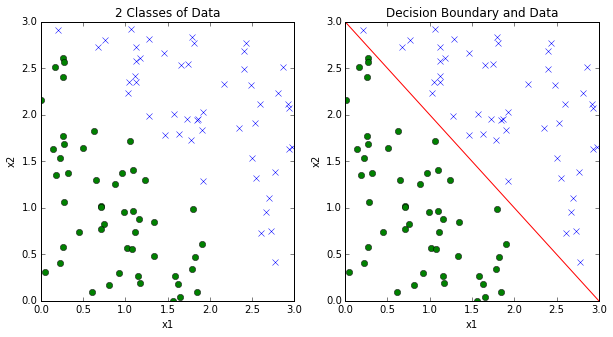

In [20]:
#As before generate 2-classes of artificial data

m=100
x=np.zeros((m,2), dtype=np.float)
count=0
count1=m/2
for i in xrange(10000):
    j=np.random.sample()*3.0
    k=np.random.sample()*3.0
    if (j+k<2.9) & (count<m/2):
        x[count][0]=j
        x[count][1]=k
        count += 1
    elif (j+k>3.1) & (count1<m):
        x[count1][0]=j
        x[count1][1]=k
        count1 += 1

#plot the data
fig=plt.figure(figsize=(10,5))
ax=plt.subplot(121)
ax.plot(x[:m/2,0],x[:m/2,1], 'go')
ax.plot(x[m/2:m,0], x[m/2:m,1], 'bx')
ax.set_title("2 Classes of Data")
ax.set_xlabel("x1")
ax.set_ylabel('x2')

#plot the data and the know decision boundary (we know the value of the parameters theta)
ax1=plt.subplot(122)
ax1.plot(x[:m/2,0],x[:m/2,1], 'go')
ax1.plot(x[m/2:m,0], x[m/2:m,1], 'bx')
ax1.set_title("Decision Boundary and Data")
ax1.set_xlabel("x1")
ax1.set_ylabel("x2")
x1=np.linspace(0.0,3.0,m)
x2=np.linspace(0.0,3.0,m)
y=[]
for x1 in xrange(m):
    for x2 in xrange(m):
        if x1+x2==3:
            y.append((x1,x2))
print y
y=np.array(y)
ax1.plot(y[:,0], y[:,1], 'r-')

---
##Normalize the data
---

In [21]:
xs = (x-x.mean())/x.std()

---
##Set up the class labels and split the 2 dimensional input data into 2 separate arrays
---

In [22]:
y1 = np.zeros(len(x))
y1[0:m/2]=0
y1[m/2:len(xs)]=1
x1 = xs[:,0]
x2 = xs[:,1]

---
##Define h using the logistic function
##Define J the new cost function
##Import the parameter update equations from linear regression
---

In [23]:
def h(x1, x2, theta0, theta1, theta2):
    return 1.0/(1.0+np.exp(-1.0*(theta0 + x1*theta1 + x2*theta2)))

def J(theta0, theta1, theta2, h, x1, x2, y):
    ht = h(x1, x2, theta0, theta1, theta2).reshape(1, len(x))
    yy = y.reshape(1, len(x1))
    sum_diff = (yy * np.log10(ht)) + ((1.0-yy)*np.log10(1.0-ht))
    return (-1.0/len(x1)) * sum_diff.sum()

def theta0_update(alpha, theta0, theta1, theta2, h, x1, x2, y):
    h1 = h(x1, x2, theta0, theta1, theta2).reshape(1,len(x1))
    yy = y.reshape(1,len(x1))
    diff = h1 - yy
    return (alpha/len(x1))*diff.sum()

def theta1_update(alpha, theta0, theta1, theta2, h, x1, x2, y):
    h1 = h(x1, x2, theta0, theta1, theta2).reshape(1,len(x1))
    yy = y.reshape(1,len(x1))
    x1 = x1.reshape(1,len(x1))
    diff = (h1 - yy)*x1
    return (alpha/len(x1))*diff.sum()

def theta2_update(alpha, theta0, theta1, theta2, h, x1, x2, y):
    h1 = h(x1, x2, theta0, theta1, theta2).reshape(1,len(x1))
    yy = y.reshape(1,len(x1))
    x2 = x2.reshape(1,len(x2))
    diff = (h1 - yy)*x2
    return (alpha/len(x2))*diff.sum()

---
##Build a series of models using a different number of iterations of greadient descent for each
##Plot the data and the decision boundary found by the 100 iterations of gradient descent
##Plot J for each model
---

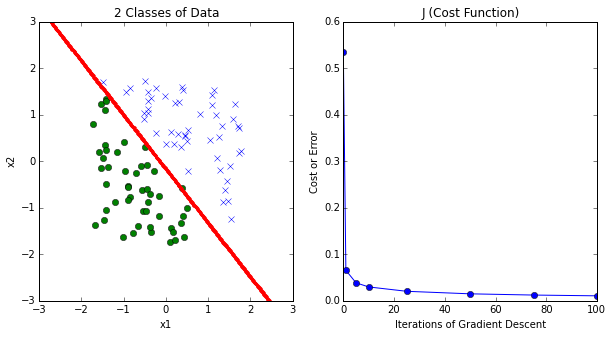

In [26]:
fig=plt.figure(figsize=(10,5))
ax=plt.subplot(121)
ax1=plt.subplot(122)

ax.plot(x1[:m/2],x2[:m/2], 'go')
ax.plot(x1[m/2:m], x2[m/2:m], 'bx')
ax.set_title("2 Classes of Data")
ax.set_xlabel("x1")
ax.set_ylabel('x2')

theta_list = []
J_list = []
for no_of_iterations in (0, 1, 5, 10, 25, 50, 75, 100):
    theta0 = 1.54
    theta1 = -1.5
    theta2 = 2.7
    alpha = 0.1
    
    for i in xrange(no_of_iterations): 
        temp0 = theta0 - theta0_update(alpha, theta0, theta1, theta2, h, x1, x2, y1)
        temp1 = theta1 - theta1_update(alpha, theta0, theta1, theta2, h, x1, x2, y1)
        temp2 = theta2 - theta2_update(alpha, theta0, theta1, theta2, h, x1, x2, y1)
        theta0 = temp0
        theta1 = temp1
        theta2 = temp2
    J_list.append((no_of_iterations, J(theta0, theta1, theta2, h, x1, x2, y1)))
    theta_list.append((theta0,theta1,theta2))


xx1=np.linspace(-3.0,3.0,500)
xx2=np.linspace(-3.0,3.0,500)
yy=[]
for xxx1 in xx1:
    for xxx2 in xx2:
        if ((theta1*xxx1+theta2*xxx2)>-1.0*(theta0+0.05)) & ((theta1*xxx1+theta2*xxx2)<-1.0*(theta0-0.05)):
            yy.append((xxx1, xxx2))

yy=np.array(yy)
jj=np.array(J_list)
#here is the decision boundary
ax.plot(yy[:,0], yy[:,1], 'r.')

#this is J
ax1.plot(jj[:,0], jj[:,1], color='blue', marker='o')
ax1.set_title("J (Cost Function)")
ax1.set_xlabel("Iterations of Gradient Descent")
ax1.set_ylabel("Cost or Error")